# Приближённое решение краевой задачи для обыкновенного дифференциального уравнения

Найти приближённое решение краевой задачи для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $ с шагом $ h $. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности. Для сравнения приведено точное решение $ u_{0}(x) $.

Оформить отчет.

Содержание отчета:

1. Постановка задачи
2. График приближенного решения (первый, второй порядок точности, точное решение) при $ h = 0.05 $
3. Графики зависимости максимального отклонения от точного решения от шага сетки $ h = 1 / N $, где $ N = 10, 20, 40, 80, 160 $
4. Выводы по результатам

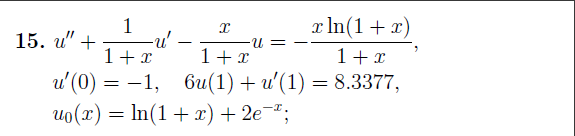

https://studopedia.ru/2_43938_differentsialnogo-uravneniya-vtorogo-poryadka-metodom-progonki.html

https://elar.urfu.ru/bitstream/10995/31219/1/978-5-7996-1342-6_2014.pdf

https://poznayka.org/s91151t2.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# u''+ (1/(1+x))*u' - (x/(1+x))*u = -(x*ln(1+x))/(1+x) = u'' + p(x)*u' + q(x)*u = f(x)
def p(x):
    return 1/(1+x)
def q(x):
    return - x/(1+x)
def f(x):
    return -(x*np.log(1+x))/(1+x)
    # Точки аналитического решения
def u0(x):
    return np.log(1+x) + 2*np.exp(-x)

h = 0.05 # Шаг
x = np.arange(0, 1+h, h) # Разбиение интервала на точки

In [ ]:
def sweep_method1(h):
    x = np.arange(0, 1+h, h)
    c_0 = -1
    d_0 = -h
    B = 8.3377

    m = -(2 - q(x) * h**2) / (1 + p(x) * h / 2)
    n = (1 - p(x) * h / 2) / (1 + p(x) * h / 2)
    f_hat = f(x) / (1 + p(x) * h / 2)

    c = [c_0]
    d = [d_0]
    for i in range(1, len(x) - 1):    #прямой ход
        c_i = 1 / (m[i] - n[i] * c[-1])
        c.append(c_i)
        d_i = f_hat[i] * h**2 - n[i] * c[-1] * d[-1]
        d.append(d_i)

    c, d = np.array(c), np.array(d)
    y_n = (B * h + 1*c[-1]*d[-1]) / (6*h + 1*(c[-1] + 1))
    y = np.zeros(len(x))
    y[-1] = y_n
    for i in range(len(y) - 2, -1, -1):    #обратный ход
        y[i] = c[i] * (d[i] - y[i+1])
    return x, y

In [ ]:
def sweep_method2(h):

    alpha1 = 1
    beta1 = 0
    gamma1 = -1
    alpha2 = 1
    beta2 = 6
    gamma2 = 8.3377
    x = np.arange(0, 1+h, h)
    n = len(x)

    a = [0]
    b = [-2 / h**2 + 2 * beta1 / (alpha1 * h) - p(x[0]) * beta1 / alpha1 + q(x[0])]
    c = [2 / h**2]
    d = [f(x[0]) + 2 * gamma1 / (alpha1 * h) - p(x[0]) * gamma1 / alpha1]

    for i in range(1, n-1):
        a.append(1 / h ** 2 - p(x[i]) / (2 * h))
        b.append(-2 / h ** 2 + q(x[i]))
        c.append(1 / h ** 2 + p(x[i]) / (2 * h))
        d.append(f(x[i]))

    a.append(2 / h ** 2)
    b.append(-2 / h ** 2 - 2 * beta2 / (alpha2 * h) - p(x[n-1]) * beta2 / alpha2 + q(x[n-1]))
    c.append(0)
    d.append(f(x[n-1]) - 2 * gamma2 / (alpha2 * h) - gamma2 * p(x[n-1]) / alpha2)

    y = np.zeros(n)
    u_b = [d[0] / b[0]]
    u_a = [-c[0] / b[0]]
    for i in range(1, n-1):
        u_b.append((d[i] - a[i] * u_b[i - 1]) / (a[i] * u_a[i-1] + b[i]))
        u_a.append(-c[i] / (a[i] * u_a[i - 1] + b[i]))
    y[n-1] = (d[n-1] - a[n-1] * u_b[n - 2]) / (b[n-1] + a[n-1] * u_a[n - 2])
    for i in range(n - 2, -1, -1):
        y[i] = y[i + 1] * u_a[i] + u_b[i]

    return x, y

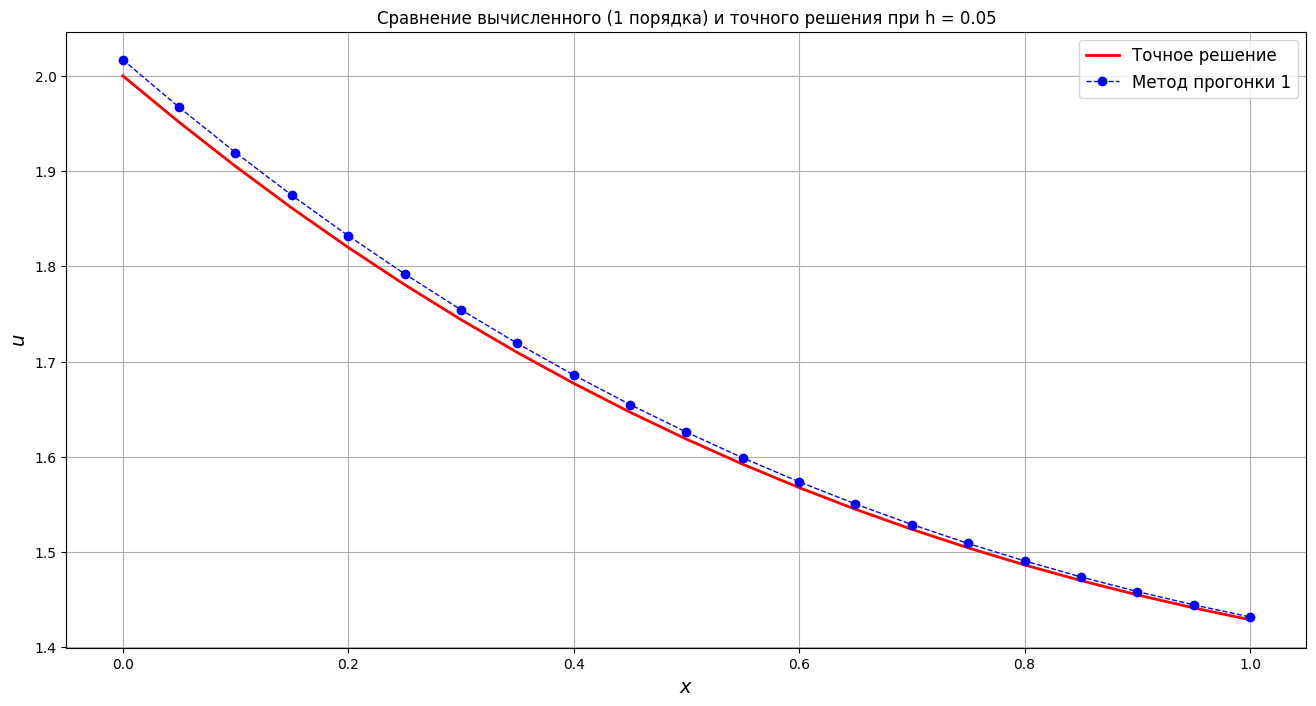

In [ ]:
x, y1 = sweep_method1(h)
plt.figure(figsize=(16, 8))
plt.plot(x, u0(x), 'r',label='Точное решение', linewidth = 2)
plt.plot(x, y1, 'ob', label='Метод прогонки 1', linestyle='--', linewidth = 1)
plt.title('Сравнение вычисленного (1 порядка) и точного решения при h = 0.05')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$u$', fontsize=14)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.show()

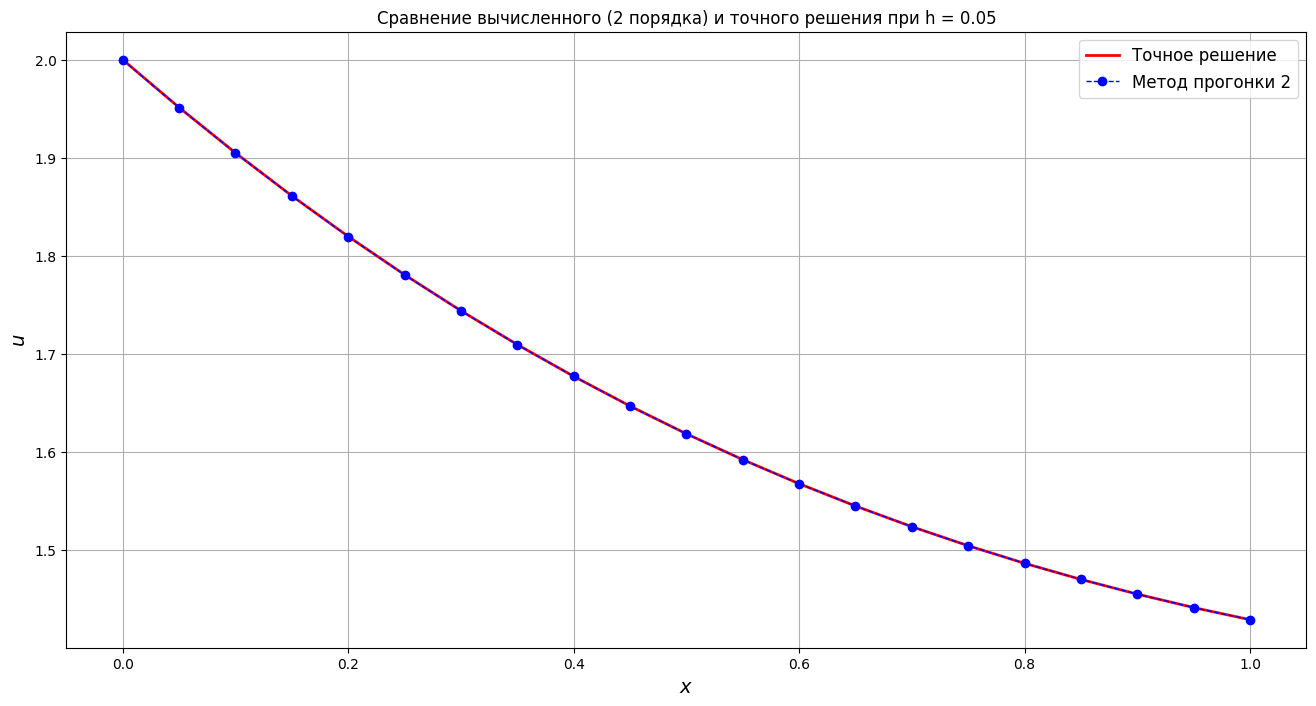

In [ ]:
x, y2 = sweep_method2(h)
plt.figure(figsize=(16, 8))
plt.plot(x, u0(x), 'r',label='Точное решение', linewidth = 2)
plt.plot(x, y2, 'ob', label='Метод прогонки 2', linestyle='--', linewidth = 1)
plt.title('Сравнение вычисленного (2 порядка) и точного решения при h = 0.05')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$u$', fontsize=14)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.show()

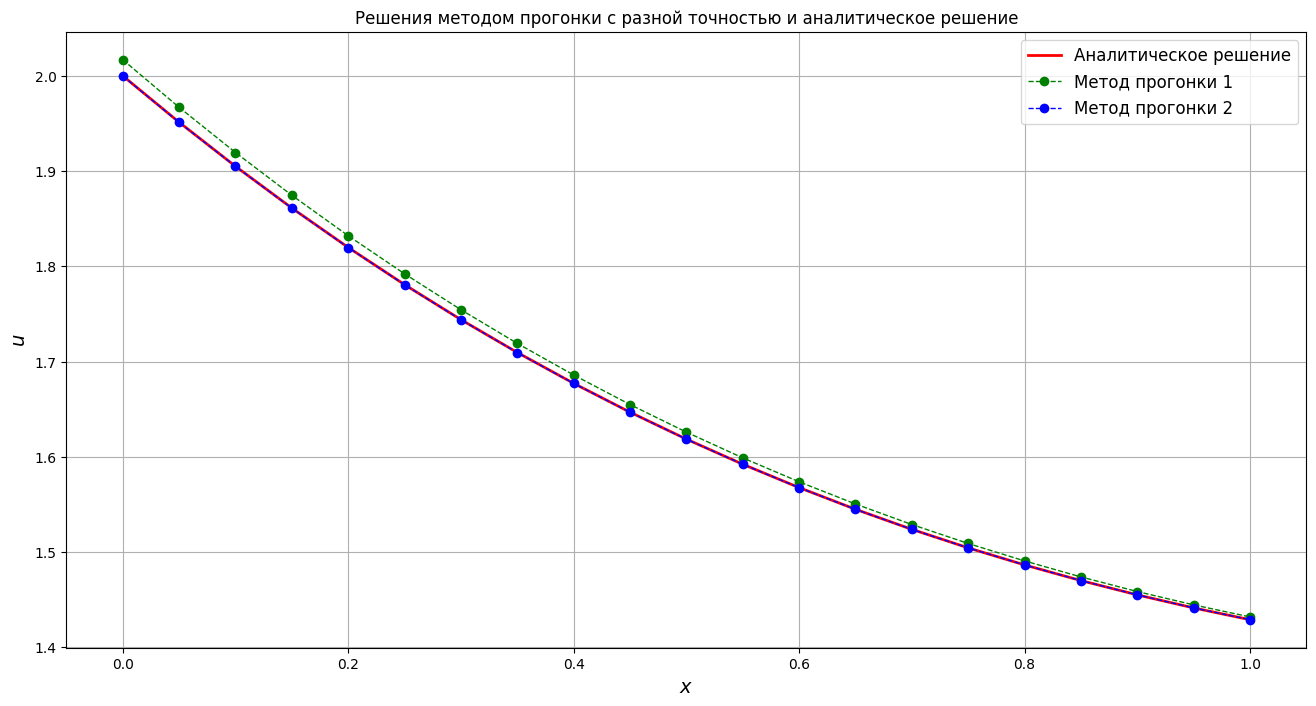

In [ ]:
x, y2 = sweep_method2(h)
x, y1 = sweep_method1(h)
plt.figure(figsize=(16, 8))
plt.plot(x, u0(x), 'r',label='Аналитическое решение', linewidth = 2)
plt.plot(x, y1, 'og', label='Метод прогонки 1', linestyle='--', linewidth = 1)
plt.plot(x, y2, 'ob', label='Метод прогонки 2', linestyle='--', linewidth = 1)
plt.title('Решения методом прогонки с разной точностью и аналитическое решение')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$u$', fontsize=14)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.show()

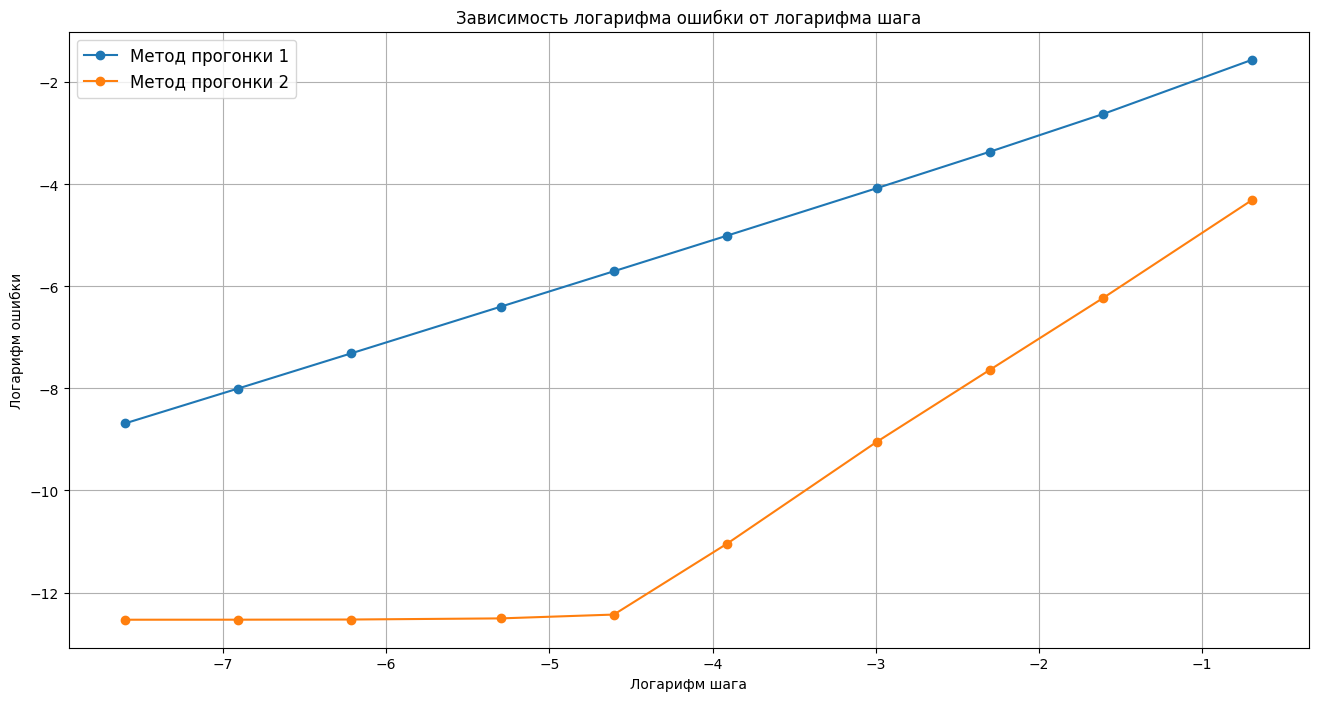

Коэффициент наклона прямой 1: 1.0217796819191016
Коэффициент наклона прямой 2: 2.072580062936666


In [ ]:
h_list = np.array([0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5])
error1 = []
error2 = []
for h in h_list:
    x, y1 = sweep_method1(h)
    x, y2 = sweep_method2(h)
    error1.append(max(np.abs(y1 - u0(x))))
    error2.append(max(np.abs(y2 - u0(x))))

plt.figure(figsize=(16, 8))
plt.plot(np.log(h_list), np.log(error1), 'o-', label='Метод прогонки 1')
plt.plot(np.log(h_list), np.log(error2), 'o-', label='Метод прогонки 2')
plt.title('Зависимость логарифма ошибки от логарифма шага')
plt.xlabel('Логарифм шага')
plt.ylabel('Логарифм ошибки')
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.show()
print('Коэффициент наклона прямой 1:', np.polyfit(np.log(h_list), np.log(error1), 1)[0])
print('Коэффициент наклона прямой 2:', np.polyfit(np.log(h_list[:-4:-1]), np.log(error2[:-4:-1]), 1)[0])